In [ ]:
import pandas as pd
import nltk
import string
import re
import ast
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
clean_data = pd.read_csv('/content/916_sentiment_pets_data_clean.csv')
clean_data

,sentences,labels,text_clean,text_preprocessing
0,Max kelihatan lesu banget. Biasanya suka lari-...,1,max kelihatan lesu banget biasanya suka lari l...,max lihat lesu banget biasa suka lari lari dal...
1,Anjingku poop di dalam rumah. Untung bukan di ...,1,anjingku poop di dalam rumah untung bukan di k...,anjing poop di dalam rumah untung bukan di kar...
2,Max sekarang sering banget menggonggong. Biasa...,1,max sekarang sering banget menggonggong biasan...,max sekarang sering banget gonggong biasa tida...
3,"Woofy kelihatan galak banget, terutama kalau d...",1,woofy kelihatan galak banget terutama kalau di...,woofy lihat galak banget utama kalau depan kuc...
4,Anjingku kalau makan ngga pernah habis. Dulu b...,1,anjingku kalau makan ngga pernah habis dulu bi...,anjing kalau makan tidak pernah habis dulu bia...
...,...,...,...,...
911,Sesi bermain pagi kami adalah puncak keceriaan...,0,sesi bermain pagi kami adalah puncak keceriaan...,sesi main pagi kami adalah puncak ceria anjing...
912,"Saat matahari terbit, kami berangkat untuk ber...",0,saat matahari terbit kami berangkat untuk berj...,saat matahari terbit kami berangkat untuk jala...
913,"Setelah bermain, anjingku biasanya merayakan ""...",0,setelah bermain anjingku biasanya merayakan wa...,telah main anjing biasa raya waktu perut koson...
914,Sesi bermain di halaman belakang pada sore har...,0,sesi bermain di halaman belakang pada sore har...,sesi main di halaman belakang pada sore hari a...


In [ ]:
slang_file = open("slang_words.txt", "r")
slang_content = slang_file.read()
slang_words = ast.literal_eval(slang_content)
slang_file.close()

In [ ]:

def remove_punctuation(text):
  text = re.sub('-',' ',text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  return text

def case_folding(text):
  text = text.lower()
  return text

def tokenizingText(text):
  text = word_tokenize(text)
  return text

def slang_word(text):
  filtered = []
  for txt in text:
    if txt not in slang_words.keys():
      filtered.append(txt)
    if txt in slang_words.keys():
      x = txt.replace(txt, slang_words[txt])
      filtered.append(x)
  text = filtered
  return text

def stemmingText(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = [stemmer.stem(word) for word in text]
  return text

def toSentence(list_words): # Convert list of words into sentence
  sentence = ' '.join(word for word in list_words)
  return sentence

In [ ]:
import numpy as np

In [ ]:
data = clean_data['text_preprocessing']
labels = np.array(clean_data['labels'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split in training validation and test sets
X_train, X_test, y_train, y_test = test = train_test_split(data, labels,test_size=0.20,
                                                           random_state=1,
                                                           stratify = labels)

In [ ]:
X_train

270    anjing saya rocky adalah yang paling ramah sos...
150    aku latih woofy untuk duduk dan guling woofy d...
290    luna anjing saya adalah sahabat yang selalu ba...
87     hari ini dia libat dalam tengkar dengan anjing...
790    hari ini saat matahari terbit aku bangun oleh ...
                             ...                        
756    saya bawa fido anjing terrier ceria ke taman m...
225    lama jalan kami henti jenak untuk makan siang ...
621    ketika dengar suara mesin potong rumput penny ...
683    baxter adalah anjing yang sangat semangat saat...
78     ketika malam tiba rex dengus dan geram seperti...
Name: text_preprocessing, Length: 732, dtype: object

In [ ]:
# lets take 10k words in num_words
tokenizer = Tokenizer(num_words=10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)+1
VOCAB_SIZE

1749

In [ ]:
import json

In [ ]:
with open('word_index.json', 'w') as json_file:
  json.dump(word_index, json_file)

In [ ]:
# maxlen = max([len(x) for x in X_train])
maxlen = 150

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen=maxlen,padding='post',truncating='post')
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen=maxlen,padding='post',truncating='post')

In [ ]:
len(train_padded_sequences[0])

150

In [ ]:
embedding_dim = 32

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE, embedding_dim, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu', return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu')),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid'),
    ])

model.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(1e-4),
                metrics = ['accuracy'])

In [ ]:
#summary of the model.
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 32)           55968     
                                                                 
 bidirectional_8 (Bidirecti  (None, 150, 32)           6272      
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)               

In [ ]:
class StopTrain(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.95):
      self.model.stop_training=True

callbacks = StopTrain()
history = model.fit(train_padded_sequences,
                    y_train,
                    validation_data = (test_padded_sequences, y_test),
                    epochs = 50,
                    callbacks=[callbacks])

Epoch 1/50
23/23 [==============================] - 10s 235ms/step - loss: 0.6931 - accuracy: 0.5068 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
23/23 [==============================] - 7s 304ms/step - loss: 0.6933 - accuracy: 0.4959 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
23/23 [==============================] - 5s 209ms/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/50
23/23 [==============================] - 5s 233ms/step - loss: 0.6931 - accuracy: 0.5041 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/50
23/23 [==============================] - 6s 267ms/step - loss: 0.6927 - accuracy: 0.4836 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 6/50
23/23 [==============================] - 5s 204ms/step - loss: 0.6926 - accuracy: 0.5232 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 7/50
23/23 [==============================] - 7s 290ms/step - loss: 0.6919 - accuracy: 0.5287 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch

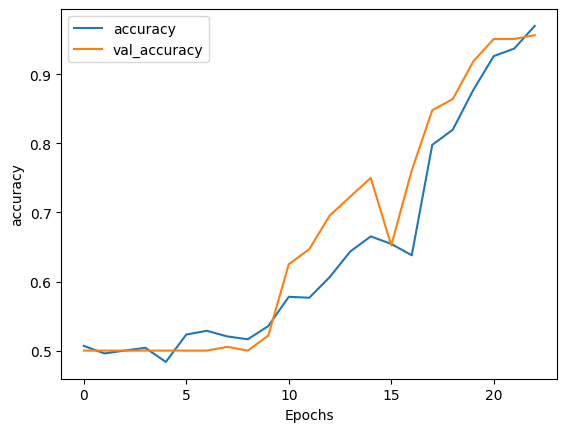

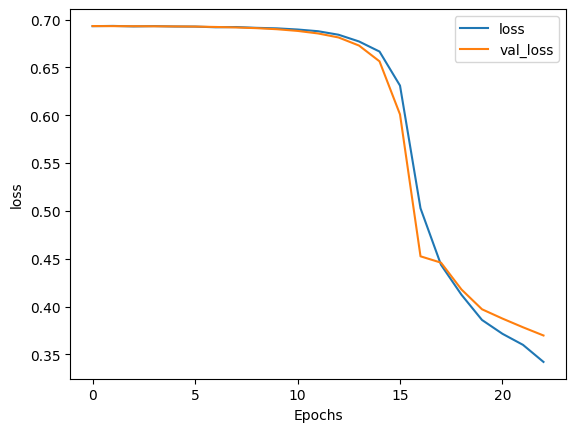

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

6/6 [==============================] - 1s 73ms/step
Model Accuracy on Test Data: 0.9565217391304348


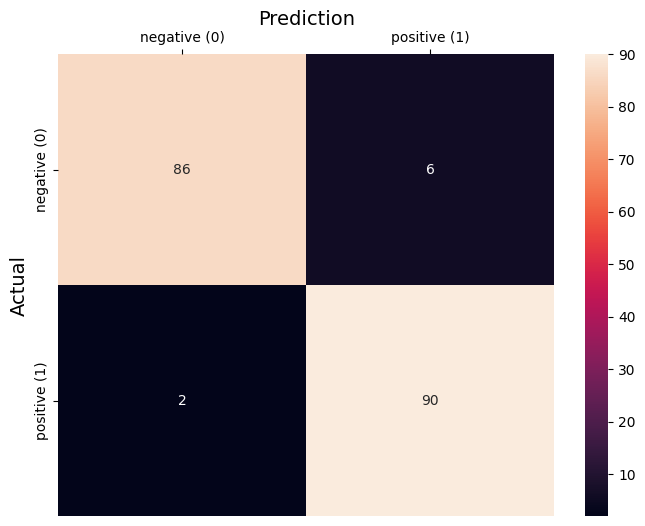

In [ ]:
y_pred = model.predict(test_padded_sequences)
for x in y_pred:
  if x[0] >0.5:
    x[0] = int(1)
  else:
    x[0] = int(0)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data:', accuracy)
confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['negative (0)', 'positive (1)'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['negative (0)', 'positive (1)'])
plt.show()

In [ ]:
# Initializing and preprocessing new text data
otherData = pd.DataFrame()
otherData['text'] = ['Anjingku berlarian kesana kemari dengan riang dan dia selalu menghabiskan makanannya.',
    'Woofy agresif banget kalo lihat anjing lain. saya takut berantem sama anjing lain.',
                     'Hari ini anjingku tidak lagi kencing sembarangan dan saya senang sekali',
                     'Anjingku tidak nafsu makan, meskipun dia masih sering bermain dengan teman-temannya',
                     'Dia hanya berbaring dan tidak melakukan banyak hal, tapi nafsu makannya meningkat',
                     'Bare sering menyisakan makanannya, dia bahkan menjadi lebih kurus dan tubuhnya sering gemetaran.',
                     'Hari ini, dia bermain dengan riang bersama teman-temannya ketika kami berjalan-jalan di taman.',
                     'Aku menyadari bahwa setiap kali aku memasak, Oliver akan bersembunyi di bawah meja dapur. Suara panci dan penggorengan tampaknya membuatnya mencari tempat berlindung.',
                     'Saat aku duduk di teras membaca buku, Bella akan duduk di sampingku, kepala di pangkuanku. Dia akan sesekali menoleh kepadaku, seolah-olah ingin memastikan bahwa aku masih di sampingnya, dan kemudian kembali menikmati hangatnya sinar matahari.',
                     'Dia melompat-lompat di sekitar tempat tidur, menunggu aku mengenakan sepatu dan jaket untuk berjalan-jalan pagi.',
                     'Milo selalu menjadi teman setia saat aku berkebun, mengikuti aku dari satu bed bunga ke bed bunga lainnya. Dia akan berbaring di bawah naungan sambil mengawasi, dan sesekali dia akan bangkit untuk membantu aku menggali lubang, meskipun kadang-kadang dia lebih suka menggali lubangnya sendiri.',
                     'Dia duduk sendirian di bawah naungan pohon, matanya mengikuti gerakan teman-temannya yang berlarian dan bermain bola dengan lesu. Tidak ada gonggongan ceria atau lompatan kegembiraan yang biasa menyertai kehadirannya. Bahkan ketika anjing-anjing lain mendekat dan mencoba mengajaknya bergabung, Simba hanya menoleh sebentar dengan ekspresi yang murung dan kemudian kembali menundukkan kepalanya, seolah-olah dia kehilangan minat pada dunia di sekitarnya.'
                     ]

otherData['text_clean'] = otherData['text'].apply(remove_punctuation)
otherData['text_clean'] = otherData['text_clean'].apply(case_folding)

otherData['text_preprocessing'] = otherData['text_clean'].apply(tokenizingText)
otherData['text_preprocessing'] = otherData['text_preprocessing'].apply(slang_word)
otherData['text_preprocessing'] = otherData['text_preprocessing'].apply(stemmingText)
otherData['text_preprocessing'] = otherData['text_preprocessing'].apply(toSentence)
otherData

,text,text_clean,text_preprocessing
0,Anjingku berlarian kesana kemari dengan riang ...,anjingku berlarian kesana kemari dengan riang ...,anjing lari kesana kemari dengan riang dan dia...
1,Woofy agresif banget kalo lihat anjing lain. s...,woofy agresif banget kalo lihat anjing lain sa...,woofy agresif banget kalau lihat anjing lain s...
2,Hari ini anjingku tidak lagi kencing sembarang...,hari ini anjingku tidak lagi kencing sembarang...,hari ini anjing tidak lagi kencing sembarang d...
3,"Anjingku tidak nafsu makan, meskipun dia masih...",anjingku tidak nafsu makan meskipun dia masih ...,anjing tidak nafsu makan meski dia masih serin...
4,Dia hanya berbaring dan tidak melakukan banyak...,dia hanya berbaring dan tidak melakukan banyak...,dia hanya baring dan tidak laku banyak hal tap...
5,"Bare sering menyisakan makanannya, dia bahkan ...",bare sering menyisakan makanannya dia bahkan m...,bare sering sisa makan dia bahkan jadi lebih k...
6,"Hari ini, dia bermain dengan riang bersama tem...",hari ini dia bermain dengan riang bersama tema...,hari ini dia main dengan riang sama teman tema...
7,"Aku menyadari bahwa setiap kali aku memasak, O...",aku menyadari bahwa setiap kali aku memasak ol...,aku sadar bahwa tiap kali aku masak oliver aka...
8,"Saat aku duduk di teras membaca buku, Bella ak...",saat aku duduk di teras membaca buku bella aka...,saat aku duduk di teras baca buku bella akan d...
9,"Dia melompat-lompat di sekitar tempat tidur, m...",dia melompat lompat di sekitar tempat tidur me...,dia lompat lompat di sekitar tempat tidur tung...


In [ ]:
X_otherData = otherData['text_preprocessing']

# tokenizer = Tokenizer(num_words=VOCAB_SIZE, split=' ', oov_token='<OOV>')
# tokenizer.fit_on_texts(X_otherData.values)
X_otherData = tokenizer.texts_to_sequences(X_otherData.values)
X_otherData = pad_sequences(X_otherData, padding='post', maxlen=maxlen)
X_otherData.shape
X_otherData

array([[  6,  28,   1, ...,   0,   0,   0],
       [219, 225,  46, ...,   0,   0,   0],
       [ 13,  12,   6, ...,   0,   0,   0],
       ...,
       [  4,  58,  58, ...,   0,   0,   0],
       [124,  21,  22, ...,   0,   0,   0],
       [  4,  81, 126, ...,   0,   0,   0]], dtype=int32)

In [ ]:
y_otherData = model.predict(X_otherData)
otherData['Result Prediction'] = y_otherData
otherData

1/1 [==============================] - 0s 51ms/step


,text,text_clean,text_preprocessing,Result Prediction
0,Anjingku berlarian kesana kemari dengan riang ...,anjingku berlarian kesana kemari dengan riang ...,anjing lari kesana kemari dengan riang dan dia...,0.464999
1,Woofy agresif banget kalo lihat anjing lain. s...,woofy agresif banget kalo lihat anjing lain sa...,woofy agresif banget kalau lihat anjing lain s...,0.773886
2,Hari ini anjingku tidak lagi kencing sembarang...,hari ini anjingku tidak lagi kencing sembarang...,hari ini anjing tidak lagi kencing sembarang d...,0.564004
3,"Anjingku tidak nafsu makan, meskipun dia masih...",anjingku tidak nafsu makan meskipun dia masih ...,anjing tidak nafsu makan meski dia masih serin...,0.618417
4,Dia hanya berbaring dan tidak melakukan banyak...,dia hanya berbaring dan tidak melakukan banyak...,dia hanya baring dan tidak laku banyak hal tap...,0.690921
5,"Bare sering menyisakan makanannya, dia bahkan ...",bare sering menyisakan makanannya dia bahkan m...,bare sering sisa makan dia bahkan jadi lebih k...,0.945642
6,"Hari ini, dia bermain dengan riang bersama tem...",hari ini dia bermain dengan riang bersama tema...,hari ini dia main dengan riang sama teman tema...,0.466576
7,"Aku menyadari bahwa setiap kali aku memasak, O...",aku menyadari bahwa setiap kali aku memasak ol...,aku sadar bahwa tiap kali aku masak oliver aka...,0.593794
8,"Saat aku duduk di teras membaca buku, Bella ak...",saat aku duduk di teras membaca buku bella aka...,saat aku duduk di teras baca buku bella akan d...,0.468155
9,"Dia melompat-lompat di sekitar tempat tidur, m...",dia melompat lompat di sekitar tempat tidur me...,dia lompat lompat di sekitar tempat tidur tung...,0.467139


In [ ]:
# Initializing and preprocessing new text data
testData = pd.DataFrame()
testData['text'] = ['Budi adalah anjing yang ceria dan suka bermain dengan Ani. Namun, sejak Ani pindah ke kota lain untuk kuliah, Budi menjadi murung dan lesu. Ia tidak lagi mau makan, bermain, atau bersosialisasi dengan anjing lain.',
    'suatu hari, Doni mengalami kecelakaan dan harus dirawat di rumah sakit. Rudi tidak bisa lagi berpetualang dengan Doni. Ia merasa bosan dan tertekan di rumah.',
                     'suatu hari, Ibu Tini meninggal karena sakit. Sari merasa sangat sedih dan kehilangan. Ia tidak mau lagi makan atau minum. Ia hanya tidur di samping foto Ibu Tini.',
                     'bola Bimo hilang. Ia mencari-cari bola itu di seluruh rumah, tetapi tidak menemukannya. Bimo merasa kecewa dan frustasi. Ia tidak lagi mau bermain dengan mainan lain. Ia hanya duduk di sudut ruangan dengan wajah muram.',
                     'sejak pandemi Covid-19 melanda, Nia tidak bisa lagi membawa Lala ke tempat-tempat ramai. Lala harus tinggal di rumah dan menjaga jarak dengan orang-orang. Lala merasa kesepian dan terisolasi.',
                     'Bona adalah anjing yang suka bermain dengan majikannya, Rama. Bona adalah anjing yang aktif dan energik. Ia selalu bersemangat saat Rama mengajaknya bermain lempar-tangkap, berlari, atau berkejaran. Bona mengalami kesenangan dan kepuasan karena dapat berinteraksi dengan Rama.',
                     'Cici adalah anjing yang suka dimandikan. Cici adalah anjing yang bersih dan wangi. Ia selalu menikmati saat majikannya, Rina, membersihkan bulunya, menyikat giginya, atau memotong kukunya. Cici mengalami kenyamanan dan kepercayaan diri karena dapat merawat dirinya.',
                     'Dodi adalah anjing yang suka makan. Dodi adalah anjing yang sehat dan kuat. Ia selalu lahap saat majikannya, Rudi, memberinya makanan yang bergizi, seperti daging, sayur, atau buah. Dodi mengalami keseimbangan dan keteraturan karena dapat memenuhi kebutuhan nutrisinya.',
                     'Eka adalah anjing yang suka tidur. Eka adalah anjing yang santai dan tenang. Ia selalu nyenyak saat majikannya, Rani, memberinya tempat tidur yang nyaman, seperti kasur, bantal, atau selimut. Eka mengalami relaksasi dan pemulihan karena dapat istirahat dengan baik.',
                     'Joko adalah anjing yang suka bermain dengan teman-temannya. Joko adalah anjing yang ceria dan bersahabat. Ia selalu bermain, berlari, atau bergulat dengan teman-temannya. Joko mengalami persahabatan dan kebersamaan karena dapat bersenang-senang dengan teman-temannya.',
                    'Jeje nampak muram ketika aku mencoba bermain dengannya. Tapi, ketika aku membawakannya mainan baru, dia nampak terkejut dan melompat-lompat kegirangan.']

testData['text_clean'] = testData['text'].apply(remove_punctuation)
testData['text_clean'] = testData['text_clean'].apply(case_folding)

testData['text_preprocessing'] = testData['text_clean'].apply(tokenizingText)
testData['text_preprocessing'] = testData['text_preprocessing'].apply(slang_word)
testData['text_preprocessing'] = testData['text_preprocessing'].apply(stemmingText)
testData['text_preprocessing'] = testData['text_preprocessing'].apply(toSentence)
X_testData = tokenizer.texts_to_sequences(testData['text_preprocessing'])
X_testData = pad_sequences(X_testData, padding='post', maxlen=maxlen)
y_testData = model.predict(X_testData)
testData['Result Prediction'] = y_testData
testData

1/1 [==============================] - 0s 49ms/step


,text,text_clean,text_preprocessing,Result Prediction
0,Budi adalah anjing yang ceria dan suka bermain...,budi adalah anjing yang ceria dan suka bermain...,budi adalah anjing yang ceria dan suka main de...,1.000000
1,"suatu hari, Doni mengalami kecelakaan dan haru...",suatu hari doni mengalami kecelakaan dan harus...,suatu hari doni alami celaka dan harus rawat d...,0.545819
2,"suatu hari, Ibu Tini meninggal karena sakit. S...",suatu hari ibu tini meninggal karena sakit sar...,suatu hari ibu tin tinggal karena sakit sari r...,0.889196
3,bola Bimo hilang. Ia mencari-cari bola itu di ...,bola bimo hilang ia mencari cari bola itu di s...,bola bimo hilang ia cari cari bola itu di selu...,0.758242
4,"sejak pandemi Covid-19 melanda, Nia tidak bisa...",sejak pandemi covid 19 melanda nia tidak bisa ...,sejak pandemi covid 19 landa nia tidak bisa la...,0.788919
5,Bona adalah anjing yang suka bermain dengan ma...,bona adalah anjing yang suka bermain dengan ma...,bona adalah anjing yang suka main dengan majik...,0.468038
6,Cici adalah anjing yang suka dimandikan. Cici ...,cici adalah anjing yang suka dimandikan cici a...,cici adalah anjing yang suka mandi cici adalah...,0.467673
7,Dodi adalah anjing yang suka makan. Dodi adala...,dodi adalah anjing yang suka makan dodi adalah...,dodi adalah anjing yang suka makan dodi adalah...,0.468164
8,Eka adalah anjing yang suka tidur. Eka adalah ...,eka adalah anjing yang suka tidur eka adalah a...,eka adalah anjing yang suka tidur eka adalah a...,0.467803
9,Joko adalah anjing yang suka bermain dengan te...,joko adalah anjing yang suka bermain dengan te...,joko adalah anjing yang suka main dengan teman...,0.467906


In [ ]:
model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_otherData

In [ ]:
print(tf.__version__)

2.14.0
